# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [1]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [2]:
dff = pd.DataFrame(df)
dff.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
dff.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [4]:
null_percentage = (dff.isnull().sum() / len(dff)) * 100
print(null_percentage)

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64


In [5]:
print(null_percentage[null_percentage>0])

workclass         5.730724
occupation        5.751198
native-country    1.754637
dtype: float64


In [6]:
dff['workclass'].unique()

['Private', 'Local-gov', NaN, 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [7]:
dff['workclass'].fillna(dff['workclass'].mode()[0],inplace=True)
dff['workclass'].unique()

/tmp/ipython-input-1613810805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['workclass'].fillna(dff['workclass'].mode()[0],inplace=True)


['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [8]:
dff['occupation'].unique()

['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', NaN, 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
Length: 15
Categories (14, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ...,
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [9]:
dff['occupation'].fillna(dff['occupation'].mode()[0],inplace=True)
dff['occupation'].unique()

/tmp/ipython-input-2417816588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['occupation'].fillna(dff['occupation'].mode()[0],inplace=True)


['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
Length: 14
Categories (14, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ...,
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [10]:
dff['native-country'].unique()

['United-States', NaN, 'Peru', 'Guatemala', 'Mexico', ..., 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']
Length: 42
Categories (41, object): ['Cambodia', 'Canada', 'China', 'Columbia', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']

In [11]:
dff['native-country'].fillna(dff['native-country'].mode()[0],inplace=True)
dff['native-country'].unique()

/tmp/ipython-input-2832635240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['native-country'].fillna(dff['native-country'].mode()[0],inplace=True)


['United-States', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', ..., 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands']
Length: 41
Categories (41, object): ['Cambodia', 'Canada', 'China', 'Columbia', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']

In [12]:
dff.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [13]:
dff.duplicated().sum()

np.int64(53)

In [14]:
dff.drop_duplicates(inplace=True)
dff.duplicated().sum()

np.int64(0)

In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48789 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48789 non-null  int64   
 1   workclass       48789 non-null  category
 2   fnlwgt          48789 non-null  int64   
 3   education       48789 non-null  category
 4   education-num   48789 non-null  int64   
 5   marital-status  48789 non-null  category
 6   occupation      48789 non-null  category
 7   relationship    48789 non-null  category
 8   race            48789 non-null  category
 9   sex             48789 non-null  category
 10  capital-gain    48789 non-null  int64   
 11  capital-loss    48789 non-null  int64   
 12  hours-per-week  48789 non-null  int64   
 13  native-country  48789 non-null  category
 14  class           48789 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


In [16]:
dff.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48789.000000,4.878900e+04,48789.000000,48789.000000,48789.000000,48789.000000
mean,38.653139,1.896697e+05,10.078809,1080.239829,87.597368,40.425895
std,13.708426,1.056182e+05,2.570072,7455.980728,403.213066,12.392856
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
numeric = dff.select_dtypes(include=['int64', 'float64'])

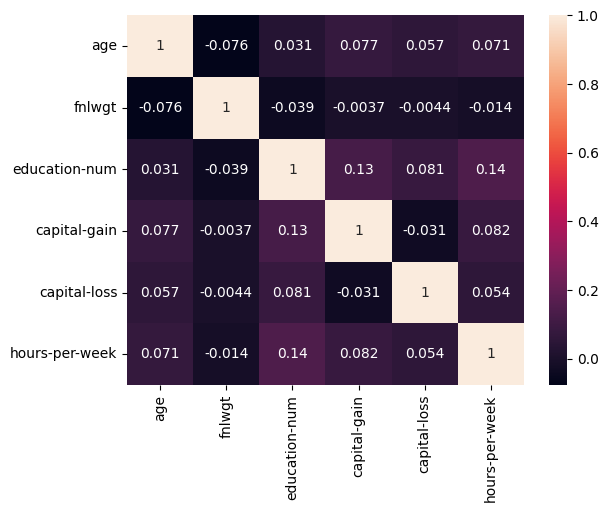

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = numeric.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train_val , X_test , y_train_val , y_test = train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)
X_train , X_val , y_train , y_val = train_test_split(X_train_val,y_train_val,test_size=0.17647,random_state=42,stratify=y_train_val)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (34188, 14)
Validation size: (7327, 14)
Test size: (7327, 14)


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import LabelEncoder

numeric_feat = dff.select_dtypes(include=['float64','int64']).columns
categorical_feat = dff.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat),
                                               ('cat', categorical_transformer, categorical_feat)])
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

X_train_np = X_train.astype(np.float32)
X_val_np   = X_val.astype(np.float32)
X_test_np  = X_test.astype(np.float32)

y_train_np = np.array(y_train_enc).astype(np.float32)
y_val_np   = np.array(y_val_enc).astype(np.float32)
y_test_np  = np.array(y_test_enc).astype(np.float32)

(34188, 6)
(7327, 6)
(7327, 6)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train,y_train)
validate = log_reg.predict(X_val)
validation_accuracy = accuracy_score(y_val, validate)
test = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, test)

print("Validation Accuracy:", validation_accuracy)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.816022928893135
Test Accuracy: 0.8235294117647058


In [22]:
Dec_tree = DecisionTreeClassifier(random_state=42)
Dec_tree.fit(X_train,y_train)
validate_dt = Dec_tree.predict(X_val)
validation_accuracy_dt = accuracy_score(y_val, validate_dt)
test_dt = Dec_tree.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, test_dt)

print("Validation Accuracy:", validation_accuracy_dt)
print("Test Accuracy:", test_accuracy_dt)

Validation Accuracy: 0.7765797734406988
Test Accuracy: 0.7750784768663846



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build NN model
def create_model(optimizer):
    model = models.Sequential([
        layers.Input(shape=(6,)),       # Your input shape is 6 features
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Optimizers
optimizers = {
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD+Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Train & evaluate
for name, opt in optimizers.items():
    print(f"\nTraining with {name}...")
    model = create_model(optimizer=opt)
    history = model.fit(X_train_np, y_train_np,
                        validation_data=(X_val_np, y_val_np),
                        epochs=10,
                        batch_size=32,
                        verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Final Validation Accuracy ({name}): {val_acc:.4f}")



Training with SGD...
Final Validation Accuracy (SGD): 0.8233

Training with SGD+Momentum...
Final Validation Accuracy (SGD+Momentum): 0.8252

Training with Adam...
Final Validation Accuracy (Adam): 0.8252


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [30]:
import time

batch_sizes = [32, 128, 1024]
results = {}
epochs = 3

X_train_sub = X_train_np[:10000]
y_train_sub = y_train_np[:10000]

for b in batch_sizes:
    print(f"\nTraining with batch size = {b}")

    # Build model
    model = create_model(tf.keras.optimizers.Adam(learning_rate=0.001))

    # Track time
    start_time = time.time()

    # Train model (on smaller subset for speed)
    history = model.fit(
        X_train_sub, y_train_sub,
        validation_data=(X_val_np, y_val_np),
        epochs=epochs,
        batch_size=b,
        verbose=0
    )

    duration = time.time() - start_time

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test_np, y_test_np, verbose=0)

    # Save results
    results[b] = {
        "train_time_sec": duration,
        "val_acc": history.history['val_accuracy'][-1],
        "test_acc": test_acc
    }

    print(
        f"Batch {b}: Time={duration:.2f}s, "
        f"Val_Acc={results[b]['val_acc']:.4f}, "
        f"Test_Acc={results[b]['test_acc']:.4f}"
    )



Training with batch size = 32
Batch 32: Time=5.60s, Val_Acc=0.8248, Test_Acc=0.8302

Training with batch size = 128
Batch 128: Time=2.43s, Val_Acc=0.8182, Test_Acc=0.8220

Training with batch size = 1024
Batch 1024: Time=2.28s, Val_Acc=0.7958, Test_Acc=0.8032



## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [31]:
from tensorflow.keras import regularizers

def create_large_model(optimizer):
    model = models.Sequential([
        layers.Input(shape=(X_train_np.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train baseline (no regularization)
baseline_model = create_large_model(tf.keras.optimizers.Adam(0.001))

history_baseline = baseline_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=15,
    batch_size=128,
    verbose=1
)


Epoch 1/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7964 - loss: 0.4279 - val_accuracy: 0.8179 - val_loss: 0.3919
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8164 - loss: 0.3905 - val_accuracy: 0.8241 - val_loss: 0.3845
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8202 - loss: 0.3907 - val_accuracy: 0.8237 - val_loss: 0.3832
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8188 - loss: 0.3878 - val_accuracy: 0.8276 - val_loss: 0.3809
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8176 - loss: 0.3874 - val_accuracy: 0.8272 - val_loss: 0.3798
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8230 - loss: 0.3806 - val_accuracy: 0.8264 - val_loss: 0.3800
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8271 - loss: 0.3779 - val_accuracy: 0.8274 - val_loss: 0.3785
Epoch 8/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8241 - loss: 0.3797 - val_accuracy:

Trainning Accuracy is more than val accuracy introducing overfitting

In [32]:
def create_l2_model(optimizer):
    model = models.Sequential([
        layers.Input(shape=(X_train_np.shape[1],)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

l2_model = create_l2_model(tf.keras.optimizers.Adam(0.001))
history_l2 = l2_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=15,
    batch_size=128,
    verbose=1
)


Epoch 1/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8019 - loss: 0.7064 - val_accuracy: 0.8263 - val_loss: 0.4312
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8201 - loss: 0.4225 - val_accuracy: 0.8213 - val_loss: 0.4095
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8153 - loss: 0.4118 - val_accuracy: 0.8224 - val_loss: 0.4018
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8180 - loss: 0.4028 - val_accuracy: 0.8241 - val_loss: 0.4005
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8255 - loss: 0.3950 - val_accuracy: 0.8256 - val_loss: 0.3953
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8191 - loss: 0.4018 - val_accuracy: 0.8248 - val_loss: 0.3944
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8224 - loss: 0.3954 - val_accuracy: 0.8213 - val_loss: 0.3959
Epoch 8/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8201 - loss: 0.3953 - val_accuracy: 

In [33]:
def create_dropout_model(optimizer):
    model = models.Sequential([
        layers.Input(shape=(X_train_np.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = create_dropout_model(tf.keras.optimizers.Adam(0.001))
history_dropout = dropout_model.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=15,
    batch_size=128,
    verbose=1
)


Epoch 1/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7952 - loss: 0.4460 - val_accuracy: 0.8272 - val_loss: 0.3876
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8160 - loss: 0.3957 - val_accuracy: 0.8230 - val_loss: 0.3885
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8221 - loss: 0.3938 - val_accuracy: 0.8248 - val_loss: 0.3863
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8168 - loss: 0.3976 - val_accuracy: 0.8211 - val_loss: 0.3891
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8170 - loss: 0.3975 - val_accuracy: 0.8256 - val_loss: 0.3841
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8165 - loss: 0.3964 - val_accuracy: 0.8256 - val_loss: 0.3827
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8211 - loss: 0.3924 - val_accuracy: 0.8248 - val_loss: 0.3840
Epoch 8/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8191 - loss: 0.3932 - val_accurac

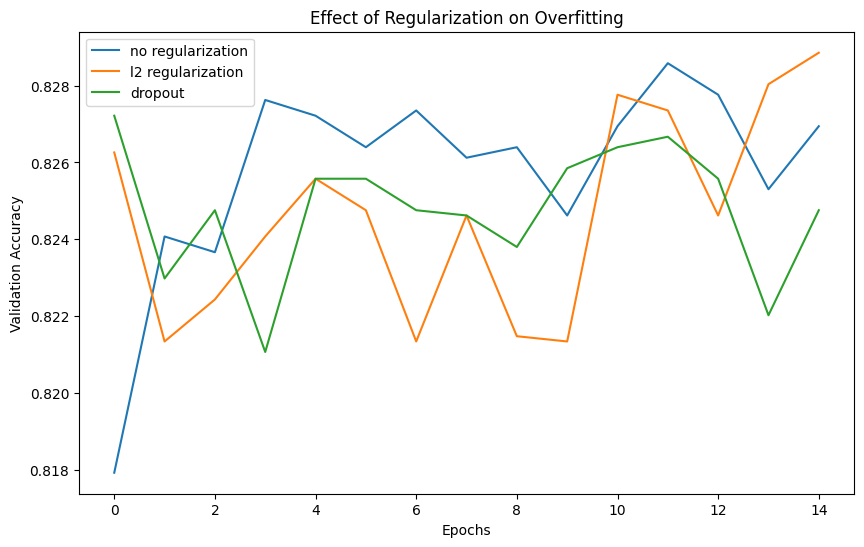

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history_baseline.history['val_accuracy'], label='no regularization')
plt.plot(history_l2.history['val_accuracy'], label='l2 regularization')
plt.plot(history_dropout.history['val_accuracy'], label='dropout')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Effect of Regularization on Overfitting")
plt.show()


Dropout is more efficent for large neural networks tabular data

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---


Training WITHOUT Early Stopping...
Epoch 1/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8067 - loss: 0.4256 - val_accuracy: 0.8253 - val_loss: 0.3863
Epoch 2/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8214 - loss: 0.3887 - val_accuracy: 0.8203 - val_loss: 0.3895
Epoch 3/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8206 - loss: 0.3831 - val_accuracy: 0.8239 - val_loss: 0.3844
Epoch 4/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8186 - loss: 0.3858 - val_accuracy: 0.8246 - val_loss: 0.3828
Epoch 5/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8239 - loss: 0.3816 - val_accuracy: 0.8279 - val_loss: 0.3812
Epoch 6/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8232 - loss: 0.3815 - val_accuracy: 0.8228 - val_loss: 0.3840
Epoch 7/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8226 - loss: 0.3802 - val_accuracy: 0.8212 - val_loss: 0.3832
Epoch 8/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.

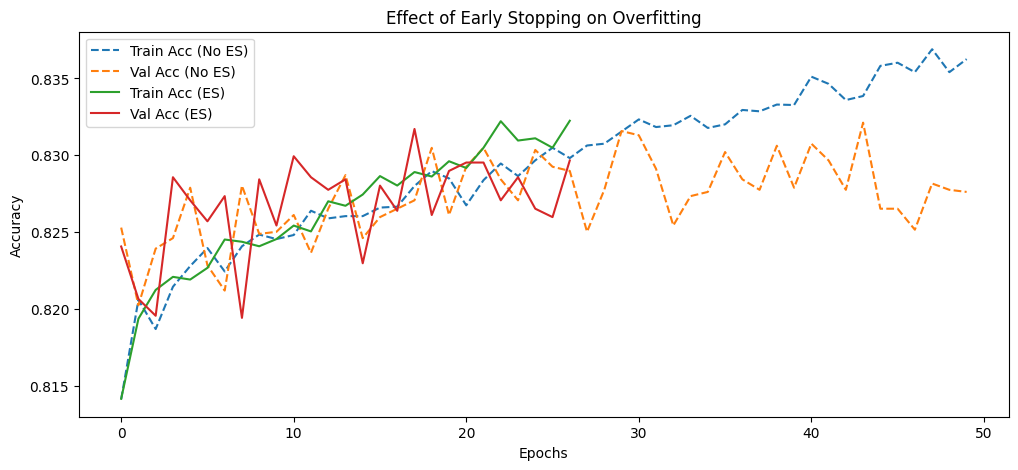


=== Without Early Stopping ===
Epochs trained: 50
Final Val Acc: 0.8276
Test Acc: 0.8370

=== With Early Stopping ===
Epochs trained: 27
Final Val Acc: 0.8297
Test Acc: 0.8375


In [36]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

print("\nTraining WITHOUT Early Stopping...")
model_no_es = create_large_model(tf.keras.optimizers.Adam(0.001))

history_no_es = model_no_es.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=50,                # train for many epochs
    batch_size=128,
    verbose=1
)

test_loss_no_es, test_acc_no_es = model_no_es.evaluate(X_test_np, y_test_np, verbose=0)


print("\nTraining WITH Early Stopping...")
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,              # wait for 5 epochs without improvement
    restore_best_weights=True
)

model_es = create_large_model(tf.keras.optimizers.Adam(0.001))

history_es = model_es.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=50,               # same max as before
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

test_loss_es, test_acc_es = model_es.evaluate(X_test_np, y_test_np, verbose=0)


# Plot Training vs Validation Accuracy
plt.figure(figsize=(12,5))

# Without Early Stopping
plt.plot(history_no_es.history['accuracy'], label='Train Acc (No ES)', linestyle='--')
plt.plot(history_no_es.history['val_accuracy'], label='Val Acc (No ES)', linestyle='--')

# With Early Stopping
plt.plot(history_es.history['accuracy'], label='Train Acc (ES)')
plt.plot(history_es.history['val_accuracy'], label='Val Acc (ES)')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of Early Stopping on Overfitting")
plt.show()


# ----- Compare Results -----
print("\n=== Without Early Stopping ===")
print(f"Epochs trained: {len(history_no_es.history['loss'])}")
print(f"Final Val Acc: {history_no_es.history['val_accuracy'][-1]:.4f}")
print(f"Test Acc: {test_acc_no_es:.4f}")

print("\n=== With Early Stopping ===")
print(f"Epochs trained: {len(history_es.history['loss'])}")
print(f"Final Val Acc: {history_es.history['val_accuracy'][-1]:.4f}")
print(f"Test Acc: {test_acc_es:.4f}")


## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

## Summary of Findings

### 🔹 Role of Optimizers
- Optimizers control how weights are updated during training.  
- **SGD**: simple but slow, with noisy updates.  
- **Adam**: adaptive learning rates, converges faster, strong default choice.  
- **Conclusion**: Adam generally performs best for tabular datasets.

---

### 🔹 Effect of Batch Size
- **Small (1, 32):** noisy updates, slower, sometimes better generalization.  
- **Medium (128):** balanced speed and generalization.  
- **Large (1024):** faster per epoch but risk of poor generalization.  
- **Conclusion**: Moderate batch size (64–256) is usually ideal.

---

### 🔹 Regularization Methods
- **L2 regularization:** discourages large weights, improves stability.  
- **Dropout:** prevents co-adaptation by randomly disabling neurons.  
- **Observation:** Dropout often reduces overfitting more strongly than L2.  
- **Conclusion**: Using both together is often most effective.

---

### 🔹 Early Stopping
- Stops training when validation loss no longer improves.  
- Prevents wasted computation and overfitting.  
- Restores the best model weights instead of the final (possibly overfit) state.  
- **Conclusion**: A simple, powerful safeguard to include in most training runs.

---

### 🔹 Train/Validation/Test Splits
- **Train:** used to fit model parameters.  
- **Validation:** used to tune hyperparameters and detect overfitting.  
- **Test:** used for final unbiased evaluation.  
- **Conclusion**: A 70/15/15 (train/val/test) split is a good default; stratify for classification.

---

## Recommended Strategy for New Tabular Datasets
- **Optimizer:** Adam (adaptive and efficient).  
- **Batch Size:** 128 (balance between speed and generalization).  
- **Regularization:** Dropout (0.2–0.5) + L2 weight decay.  
- **Early Stopping:** Always enabled, monitor validation loss, patience = 5–10 epochs.  
- **Data Splitting:** Train 70%, Validation 15%, Test 15% (stratified if classification).  

✅ This setup balances training speed, stability, and generalization for deep learning models on tabular datasets.